# Data Exploraton Part 2


In this script, our objective is to explore the dataset that we did not cover in the previous data exploration, specifically 'Top 3 Least Happy Regions', using various plots, address clarifying questions.

## INDEX

-  [Clean Data](#Clean-Data) 
- [Data Exploration](#Data-Exploration)
    - [Heatmap](#Heatmap)
        - [Heatmap Insights](#Heatmap-Insights)
    - [Scatterplot](#Scatterplot)
    - [Subplot](#Subplot)
- [Key Insights](#Key-Insights)

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [5]:
#import Top 3 Least Happy Region 

path = '/Users/satoruteshima/Documents/CareerFoundry/06 Date Immersion 6/Data/Clean'
df = pd.read_csv(os.path.join(path, 'Worst3Happy.csv'), index_col = False)

### Clean Data

In [9]:
#drop unnecessary columns

Dropcolumns = ['Unnamed: 0.2'
               ,'Unnamed: 0.1'
                ,'Unnamed: 0'
                ,'Happiness Rank'
                ,'Rank.1'
                ,'Rank.2'
                ,'Rank.3'
                ,'Mean Rank'
                ,'Year'
                ,'Unnamed: 0.1'
]

df = df.drop(columns=Dropcolumns)

In [17]:
#Drop 'Rank' as well

df = df.drop (columns = 'Rank')

In [18]:
df.head(5)

,Country,Region,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Israel,Middle East and North Africa,7.278,1.22857,0.91387,0.41319,0.07785,0.33172
1,United Arab Emirates,Middle East and North Africa,6.901,1.42727,0.80925,0.64157,0.38583,0.26428
2,Saudi Arabia,Middle East and North Africa,6.411,1.39541,0.72025,0.31048,0.32524,0.13706
3,Kuwait,Middle East and North Africa,6.295,1.55422,0.72492,0.55499,0.25609,0.16228
4,Bahrain,Middle East and North Africa,5.960,1.32376,0.74716,0.45492,0.30600,0.17362


## Data Exploration

In [13]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [19]:
# Create a correlation matrix using pandas

df.corr()

/var/folders/y7/609s2c2s66d153pxhbp7hmhh0000gn/T/ipykernel_73543/1125721538.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.000000,0.663853,0.554938,0.283917,0.154972,0.001543
Economy (GDP per Capita),0.663853,1.000000,0.631403,0.244009,0.195532,-0.269063
Health (Life Expectancy),0.554938,0.631403,1.000000,0.140469,0.200703,-0.093676
Freedom,0.283917,0.244009,0.140469,1.000000,0.360836,0.193127
Trust (Government Corruption),0.154972,0.195532,0.200703,0.360836,1.000000,0.006536
Generosity,0.001543,-0.269063,-0.093676,0.193127,0.006536,1.000000


## Heatmap 

/var/folders/y7/609s2c2s66d153pxhbp7hmhh0000gn/T/ipykernel_73543/1843011407.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df.corr(), annot=True, ax=ax)


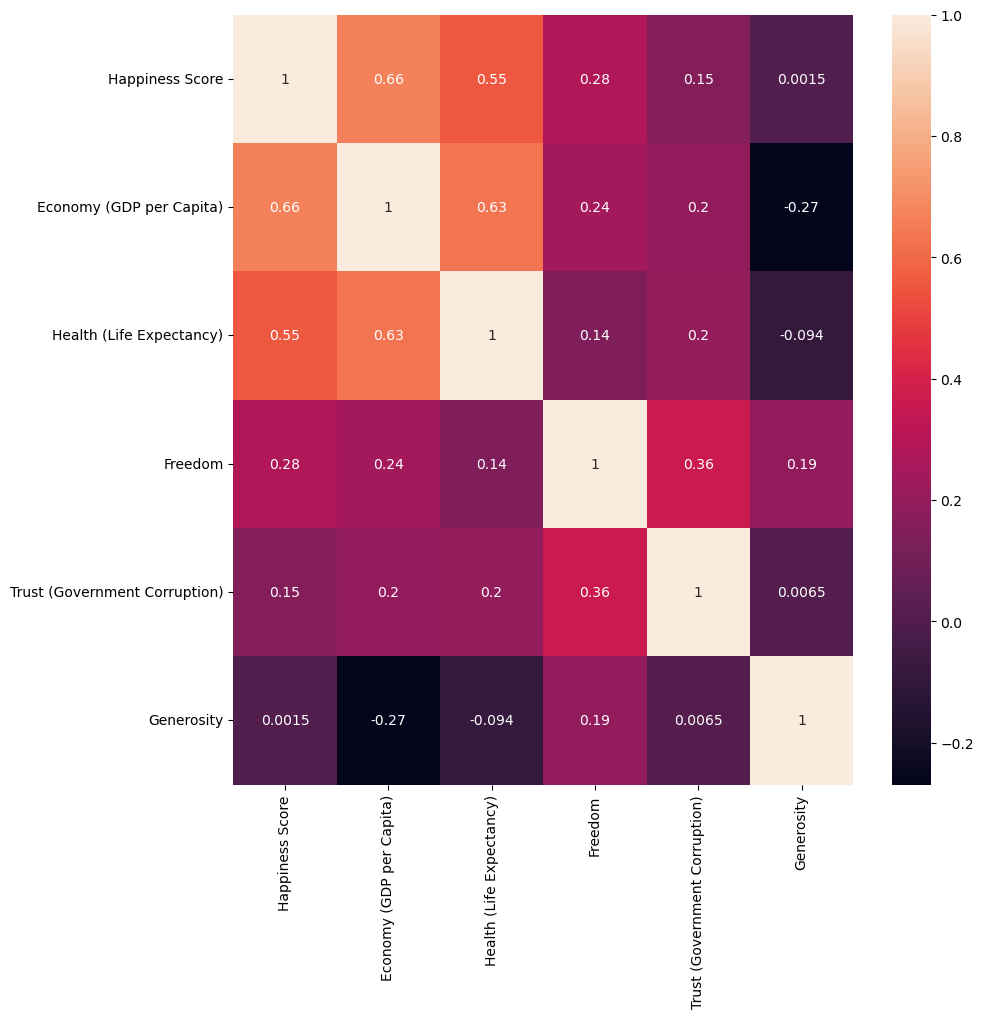

In [20]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10, 10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df.corr(), annot=True, ax=ax)

# Save the plot as an image file (e.g., PNG)
fig = corr.get_figure()
fig.savefig('correlation_heatmap.png', bbox_inches='tight')

### Heatmap Insights

- There is strong positive correlationship between happiness score and Economy, as well as health. 
- Close to no relationship between Generosity and Happiness Score. 
- A weak negative relationship between economy and generosity.  

## Scatterplot

Explore the relationship between happiness score and economy

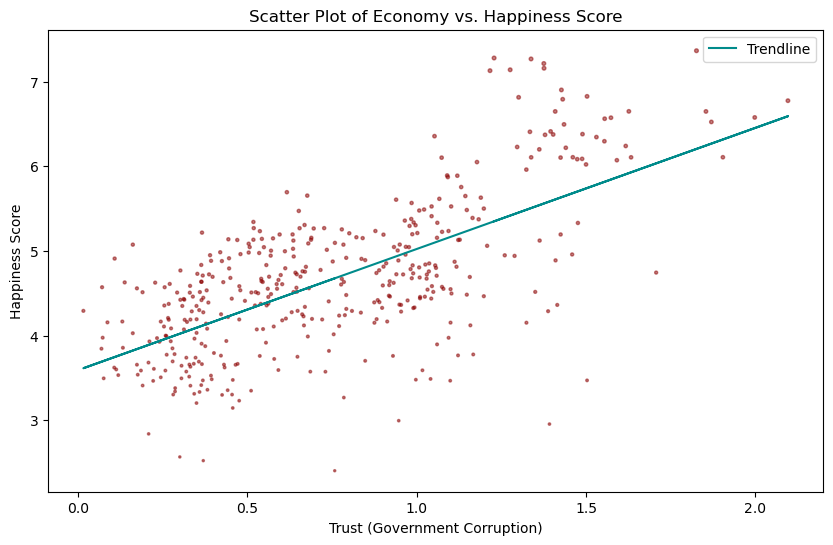

In [23]:
# Data
xpoints = np.array(df['Economy (GDP per Capita)'])
ypoints = np.array(df['Happiness Score'])
sizes = np.array(df['Happiness Score'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(xpoints, ypoints, c='darkred', s=sizes, alpha=0.5)

# Fit a trendline (regression line)
z = np.polyfit(xpoints, ypoints, 1)
p = np.poly1d(z)
plt.plot(xpoints, p(xpoints), '#008B8B', label='Trendline')

# Set x-axis and y-axis labels
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Score')

# Set title
plt.title('Scatter Plot of Economy vs. Happiness Score')

# Add a legend
plt.legend()

# Save the figure
plt.savefig('scatterplot_worst.png')

plt.show()

## Subplot 

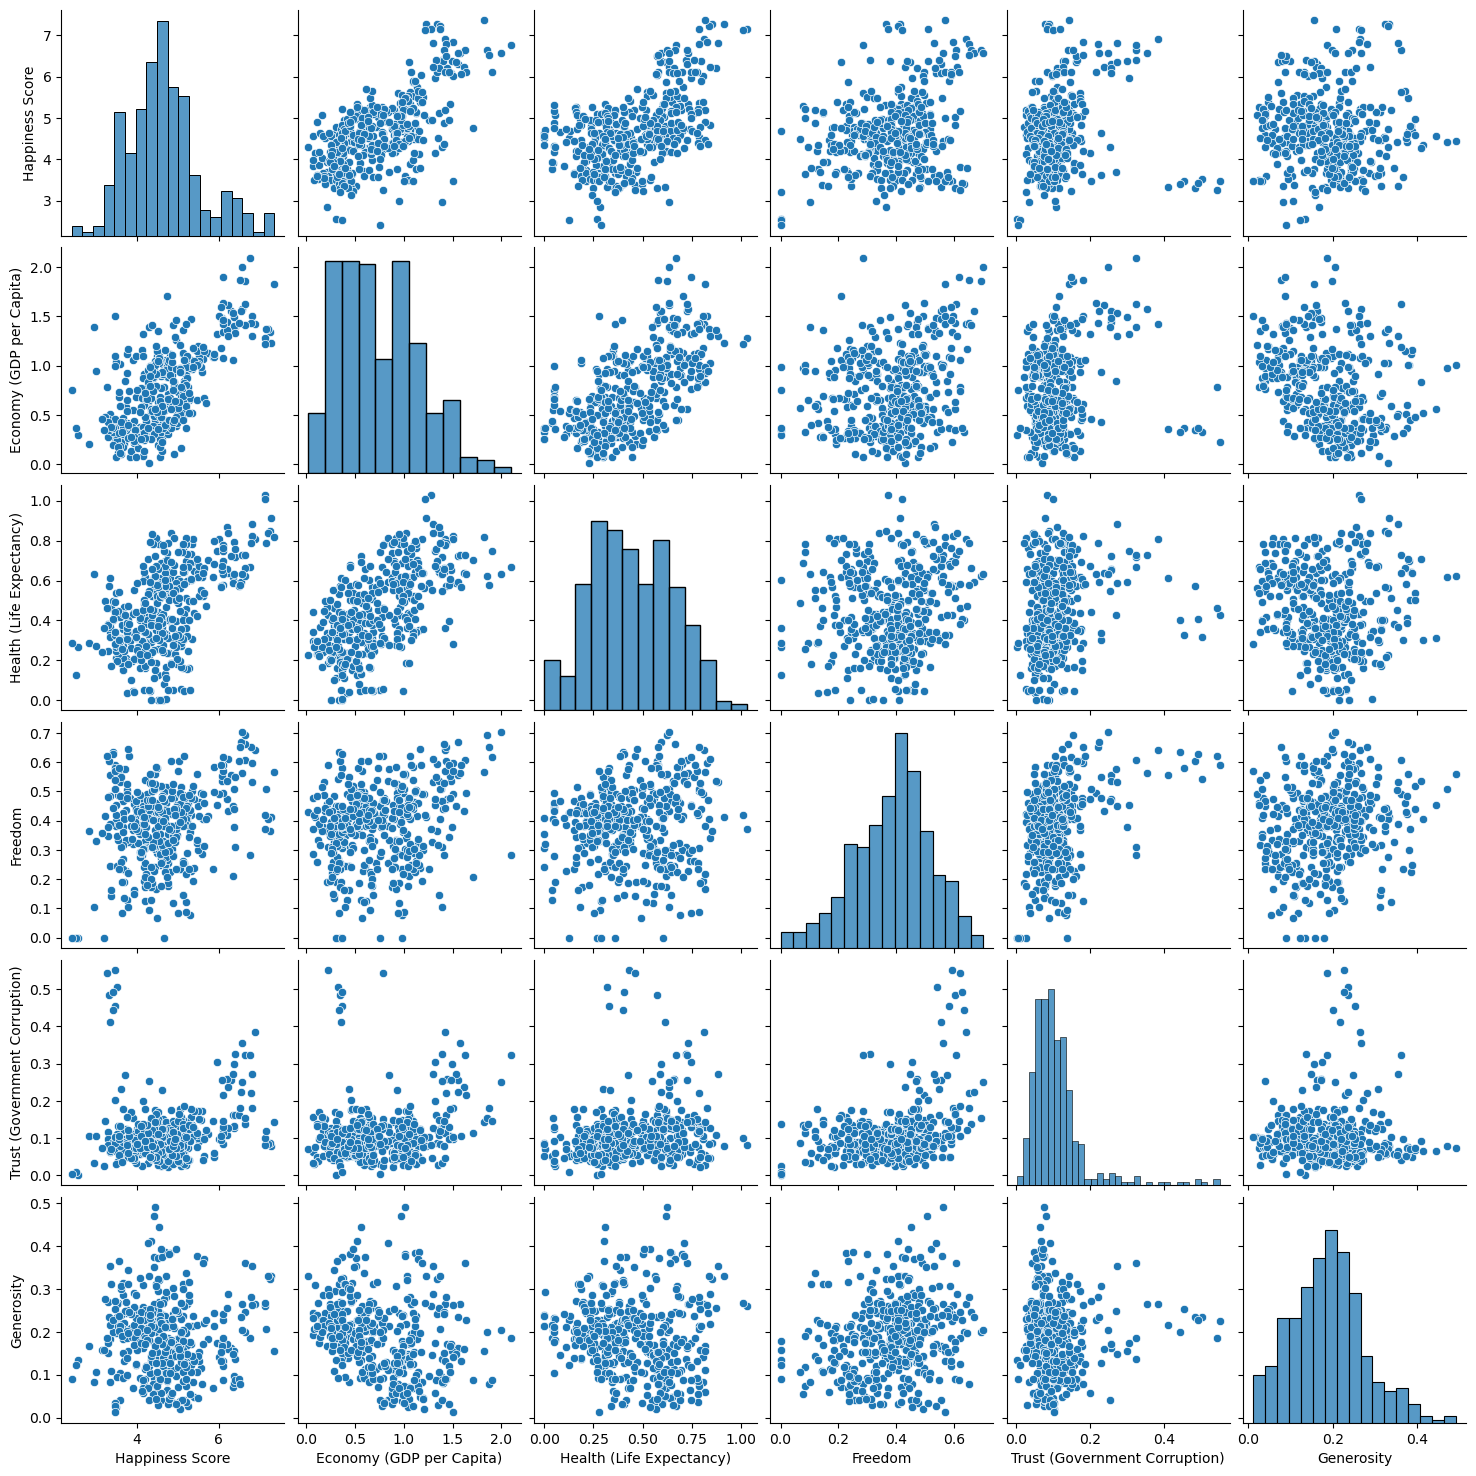

In [25]:
# Create a pair plot
g = sns.pairplot(df)
plt.savefig('pairplot_worst.png')

# Key Insights

- For the least happy regions, Economy and Health are two biggest factores for happiness. 
- Trust of the government is overall very low.
- Close to no relationship between generocity and economy, which means just because the economy is better, it does not afford people to feel generous. 

## Key Differences between Top 3 Happy Regions and Top 3 Least Happy Regions

- While Happy Regions valued **trust in the government** and **freedom** in order to feel happy,  **economy** and **health** are the two biggest concerns for Least Happy Regions. 

## Back to the [TOP](#INDEX)